In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits

Read the simulated images

In [21]:
du_1 = fits.open("/Users/ishaandas/Documents/ASTR_19/FInalProject/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
hdu_2 = fits.open("/Users/ishaandas/Documents/ASTR_19/FInalProject/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
hdu_3 = fits.open("/Users/ishaandas/Documents/ASTR_19/FInalProject/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

data_1 = hdu_1[0].data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data

Rescale Image function and function to quickly plot rescaled data

In [25]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

def fits_quicklook(data, fnx=10, fny=10):
    f = plt.figure(figsize=(fnx, fny))
    pdata_tmp, vpmin, vpmax = rescale_image(data)
    plt.imshow(pdata_tmp, vmin=vpmin, vmax=vpmax)
    
    

3-color image from this data

In [26]:
data_1_res, d1min, d1max = rescale_image(data_1)
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)

Limit the data between min and max

In [27]:
data_1_res[data_1_res<d1min] = d1min
data_1_res[data_1_res>d1max] = d1max
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max

Create RGB image 

In [28]:
rgb = np.zeros((data_1_res.shape[0], data_1_res.shape[1], 3))
rgb[:,:,0] = (data_1_res-d1min)/(d1max-d1min)
rgb[:,:,1] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,2] = (data_3_res-d3min)/(d3max-d3min)

Plot the RGB image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


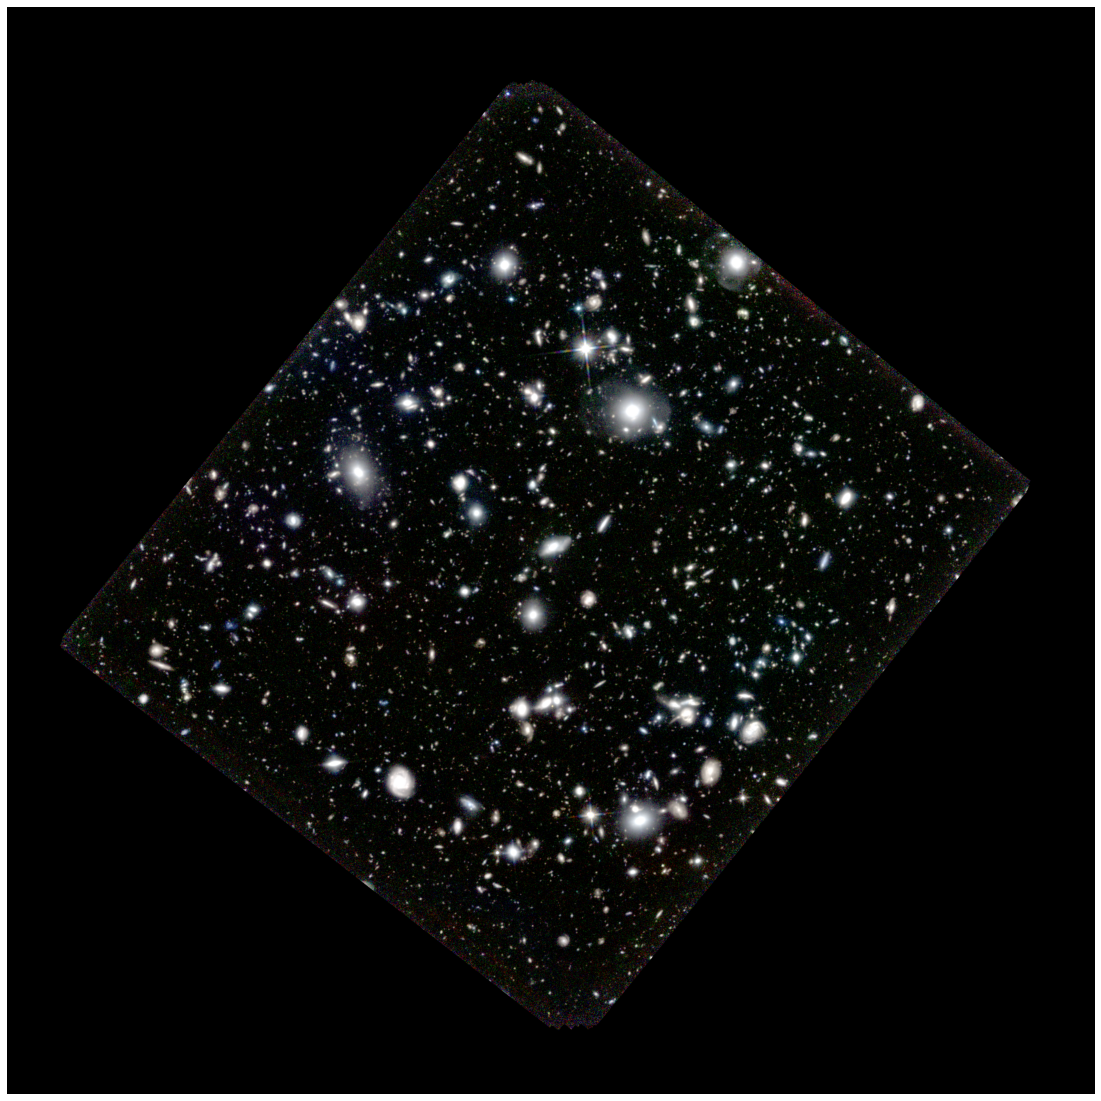

In [29]:
f, ax = plt.subplots(1, 1, figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig("ThreeColorFalseImage.png")
